In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(11, 4)})
from scipy import stats
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from mlxtend.plotting import plot_decision_regions

In [2]:
colgate = pd.read_csv("outbound_phl_colgate.csv")
colgate.head(10)

,Unnamed: 0,region,dbid,deliverydate,storerkey,company,CustomerGroupName,MarketSegment,CountryOfOrigin,containertype,...,sku,descr.1,skugroup,style,class,size,uom,shippedqty,cube,weight
0,0,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH02800A,COL TP TAS 120g Twinpack ...,STD,NaN,B,,CASE,3456,1.210097,528.000768
1,1,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH03178A,GARD REFRESH MENTHOL 13.5MLx432 TRIPLE ...,STD,NaN,A,,CASE,4320,0.229710,88.452000
2,2,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH03557A,Colgate GRF Sachet 24g (RL)_PH ...,CDC,NaN,B,,CASE,288000,22.740480,7512.000000
3,3,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH03178A,GARD REFRESH MENTHOL 13.5MLx432 TRIPLE ...,STD,NaN,A,,CASE,1728,0.091884,35.380800
4,4,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH03557A,Colgate GRF Sachet 24g (RL)_PH ...,CDC,NaN,B,,CASE,56448,4.457134,1472.352000
5,5,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,1529621,PALM CON SILKY STRAIGHT 180MLx24_NG ...,HAIR,NaN,C,,CASE,96,0.054633,16.000000
6,6,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH02800A,COL TP TAS 120g Twinpack ...,STD,NaN,B,,CASE,5760,2.016828,880.001280
7,7,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH03557A,Colgate GRF Sachet 24g (RL)_PH ...,CDC,NaN,B,,CASE,64800,5.116608,1690.200000
8,8,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH02755A,PO SH INTENS MOIST 15MLx432 TRIPLE_PHx,STD,NaN,A,,CASE,96768,5.145504,1791.998208
9,9,HKG,HK01_DATAMART,1/2/2021,PH01,"Colgate-Palmolive Philippines, Inc.",Colgate-Palmolive Company,FMCG,,,...,TH02756A,PO SH HEALTHY&SMOOTH 15MLx432 TRIPLE_PH ...,STD,NaN,B,,CASE,96768,5.145504,1791.998208


In [3]:
colgate.shape

(1620759, 23)

In [4]:
colgate.isnull().sum()

Unnamed: 0                 0
region                     0
dbid                       0
deliverydate               0
storerkey                  0
company                    0
CustomerGroupName          0
MarketSegment              0
CountryOfOrigin         6835
containertype           6837
facility                   0
descr                      0
orderkey                   0
sku                        0
descr.1                    0
skugroup                   0
style                1616606
class                      0
size                       0
uom                        0
shippedqty                 0
cube                       0
weight                     0
dtype: int64

In [5]:
del colgate['region']
del colgate['dbid']
del colgate['storerkey']
del colgate['company']
del colgate['CustomerGroupName']
del colgate['MarketSegment']
del colgate['CountryOfOrigin']
del colgate['containertype']
del colgate['facility']
del colgate['descr']
del colgate['orderkey']
del colgate['style']
del colgate['sku']
del colgate['cube']
del colgate['weight']
del colgate['class']
del colgate['size']
del colgate['descr.1']
del colgate['uom']
colgate.head(10)

,Unnamed: 0,deliverydate,skugroup,shippedqty
0,0,1/2/2021,STD,3456
1,1,1/2/2021,STD,4320
2,2,1/2/2021,CDC,288000
3,3,1/2/2021,STD,1728
4,4,1/2/2021,CDC,56448
5,5,1/2/2021,HAIR,96
6,6,1/2/2021,STD,5760
7,7,1/2/2021,CDC,64800
8,8,1/2/2021,STD,96768
9,9,1/2/2021,STD,96768


In [6]:
Filter_skugroup=colgate["skugroup"].unique()
print('Filter_skugroup:',Filter_skugroup)

Filter_skugroup: ['STD' 'CDC' 'HAIR' 'TB' '1002' 'AXION' '25131' 'SOAP' 'MW' 'TALC' '2012'
 '2010' '2045' '1001' 'Floss' '1006' '1003' '2011' '31303' '025131'
 '01001' '01002' '02045' '01006' '02010' '02012' '02011' '01003']


In [7]:
# temp_df=colgate
# for x in Filter_skugroup:
#     name= x
#     w =colgate.loc[temp_df['skugroup'] == x]
#     print(name,len(w))
colgate_STD =colgate.loc[colgate['skugroup'] == 'STD']
colgate_others =colgate.loc[colgate['skugroup'] != 'STD']
del colgate_STD['skugroup']
del colgate_others['skugroup']

In [8]:
#Apparel
colgate_STD['deliverydate']=pd.to_datetime(colgate_STD['deliverydate'])
colgate_STD_Groupped = colgate_STD.groupby(pd.Grouper(key='deliverydate', axis=0, freq='1D', sort=True))
result_colgate_STD=colgate_STD_Groupped.sum()
Finalresult_colgate_STD = result_colgate_STD["shippedqty"].to_frame()
Finaldateframe_colgate_STD=Finalresult_colgate_STD[~(Finalresult_colgate_STD==0).any(axis=1)]
Finaldateframe_colgate_STD.reset_index()[['deliverydate', 'shippedqty']].to_csv('STD_outlier_dataset.csv',index=False)
#Others
colgate_others['deliverydate']=pd.to_datetime(colgate_others['deliverydate'])
colgate_others_Groupped = colgate_others.groupby(pd.Grouper(key='deliverydate', axis=0, freq='1D', sort=True))
result_colgate_others=colgate_others_Groupped.sum()
Finalresult_colgate_others = result_colgate_others["shippedqty"].to_frame()
Finaldateframe_colgate_others=Finalresult_colgate_others[~(Finalresult_colgate_others==0).any(axis=1)]
Finaldateframe_colgate_others.reset_index()[['deliverydate', 'shippedqty']].to_csv('others_outlier_dataset.csv',index=False)

/var/folders/tk/18btw3h93bq0rk_cn_55mh900000gn/T/ipykernel_60398/3424330745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colgate_STD['deliverydate']=pd.to_datetime(colgate_STD['deliverydate'])
/var/folders/tk/18btw3h93bq0rk_cn_55mh900000gn/T/ipykernel_60398/3424330745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colgate_others['deliverydate']=pd.to_datetime(colgate_others['deliverydate'])


In [9]:
pf_STD = pd.read_csv("STD_outlier_dataset.csv")
data_STD=pf_STD['shippedqty']
pf_others = pd.read_csv("others_outlier_dataset.csv")
data_others=pf_others['shippedqty']

In [17]:
def Outiler(data):
    median = statistics.median(data)
    Q3 = (3/4)*median
    Q1 = (1/4)*median
    IQR = Q3-Q1
    lower_outlier = Q1 - 1.5*IQR
    higher_outlier = Q3 + 1.5*IQR
    plt.boxplot(data)
    plt.axhline(y=lower_outlier, color='blue', linestyle='-')
    plt.axhline(y=higher_outlier, color='green', linestyle='-')
    print('Q3:',Q3)
    print('Q1:',Q1)
    print('IQR:',IQR)
    print('lower_outlier:',lower_outlier)
    print('higher_outlier:',higher_outlier)
    return Q3,Q1,IQR,lower_outlier,higher_outlier

Q3: 3040002.75
Q1: 1013334.25
IQR: 2026668.5
lower_outlier: -2026668.5
higher_outlier: 6080005.5
Q3: 3040002.75
Q1: 1013334.25
IQR: 2026668.5
lower_outlier: -2026668.5
higher_outlier: 6080005.5


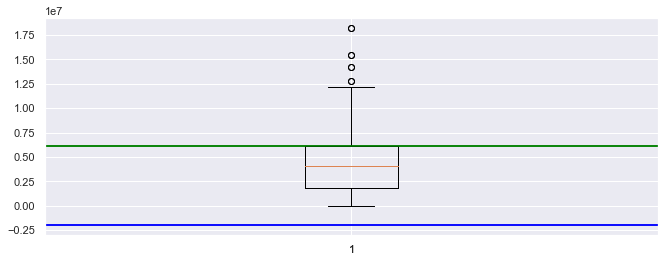

In [18]:
data=data_STD
Outiler(data)
Q3,Q1,IQR,lower_outlier,higher_outlier=Outiler(data)

In [19]:
Q3_STD=Q3
IQR_STD=IQR
pf_STD.loc[data > (Q3_STD + 1.5 * IQR_STD) ] = np.nan
pf_STD.to_csv('STD_outlier_dataset.csv',index=False)
pf_STD.dropna(axis = 0).to_csv('STD_outlier_dataset.csv',index=False)

Q3: 1393014.0
Q1: 464338.0
IQR: 928676.0
lower_outlier: -928676.0
higher_outlier: 2786028.0
Q3: 1393014.0
Q1: 464338.0
IQR: 928676.0
lower_outlier: -928676.0
higher_outlier: 2786028.0


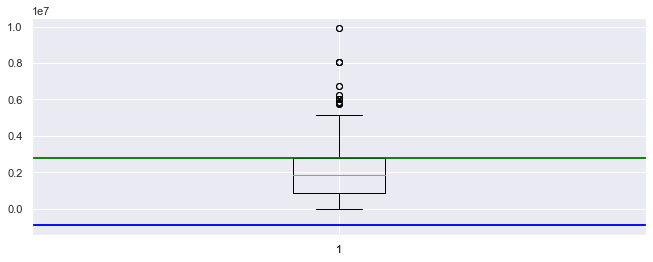

In [20]:
data=data_others
Outiler(data)
Q3,Q1,IQR,lower_outlier,higher_outlier=Outiler(data)

In [21]:
Q3_others=Q3
IQR_others=IQR
pf_others.loc[data > (Q3_others + 1.5 * IQR_others) ] = np.nan
pf_others.to_csv('others_outlier_dataset.csv',index=False)
pf_others.dropna(axis = 0).to_csv('others_outlier_dataset.csv',index=False)